<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/Decision_Tress(Assignment1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#   Fraud Check 

#  Use decision trees to prepare a model on fraud data 
#  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
# Importing the librarires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [ ]:
# Loading the file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check (1).csv to Fraud_check (1) (1).csv


In [ ]:
f_c = pd.read_csv('Fraud_check (1).csv')
f_c.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
# Checking for Null values

In [ ]:
f_c.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
# EDA Cleaning

In [ ]:
# Drop City.Populaion column , as it is not required

In [ ]:
f_c = f_c.drop('City.Population',axis=1)

In [ ]:
f_c

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [ ]:
# Labelling the non numeriacal variables

# Undergrad  ,  Marital.Status  ,  Urban

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
f_c['Undergrad1'] = label_encoder.fit_transform(f_c['Undergrad'])
f_c['Marital.Status1'] = label_encoder.fit_transform(f_c['Marital.Status']) 
f_c['Urban1'] = label_encoder.fit_transform(f_c['Urban'])


In [ ]:
f_c

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Undergrad1,Marital.Status1,Urban1
0,NO,Single,68833,10,YES,0,2,1
1,YES,Divorced,33700,18,YES,1,0,1
2,NO,Married,36925,30,YES,0,1,1
3,YES,Single,50190,15,YES,1,2,1
4,NO,Married,81002,28,NO,0,1,0
...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,7,YES,1,0,1
596,YES,Divorced,69967,2,YES,1,0,1
597,NO,Divorced,47334,0,YES,0,0,1
598,YES,Married,98592,17,NO,1,1,0


In [ ]:
# Now, we need to add one extra column for risk in taxable column

# if taxable income <= 30,000  , it is risky
# if taxable income > = 30,000  , it is good.

In [ ]:
ti_check = []
for i in f_c['Taxable.Income']:
  if i<= 30000:
    print('risky')
  else:
    print('good') 
     

good
good
good
good
good
good
good
good
good
good
risky
good
risky
good
good
good
risky
good
good
risky
good
risky
good
good
good
good
good
good
risky
good
good
good
good
good
risky
good
risky
good
risky
good
good
good
good
good
good
good
good
good
risky
good
good
good
good
risky
good
risky
good
good
risky
good
good
risky
good
good
good
good
good
good
risky
good
good
good
good
good
good
good
good
good
good
risky
good
good
good
good
good
risky
good
risky
good
risky
good
good
good
risky
risky
good
risky
good
risky
good
good
good
good
good
good
good
risky
good
good
good
risky
good
good
good
risky
good
good
good
risky
good
good
risky
risky
risky
good
good
risky
good
good
good
good
good
good
good
good
risky
good
risky
good
good
risky
good
good
risky
good
good
good
good
good
good
good
good
risky
risky
risky
good
good
good
risky
good
good
good
good
risky
good
good
good
good
risky
good
good
risky
risky
good
good
good
good
good
good
risky
good
risky
risky
good
good
good
good
good
risky
good
goo

In [ ]:
f_c['Taxable.Income']=pd.cut(f_c['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [ ]:
f_c

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Undergrad1,Marital.Status1,Urban1
0,NO,Single,good,10,YES,0,2,1
1,YES,Divorced,good,18,YES,1,0,1
2,NO,Married,good,30,YES,0,1,1
3,YES,Single,good,15,YES,1,2,1
4,NO,Married,good,28,NO,0,1,0
...,...,...,...,...,...,...,...,...
595,YES,Divorced,good,7,YES,1,0,1
596,YES,Divorced,good,2,YES,1,0,1
597,NO,Divorced,good,0,YES,0,0,1
598,YES,Married,good,17,NO,1,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
f_c['TI'] = labelencoder.fit_transform(f_c['Taxable.Income'])

In [ ]:
f_c

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Undergrad1,Marital.Status1,Urban1,TI
0,NO,Single,good,10,YES,0,2,1,0
1,YES,Divorced,good,18,YES,1,0,1,0
2,NO,Married,good,30,YES,0,1,1,0
3,YES,Single,good,15,YES,1,2,1,0
4,NO,Married,good,28,NO,0,1,0,0
...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,good,7,YES,1,0,1,0
596,YES,Divorced,good,2,YES,1,0,1,0
597,NO,Divorced,good,0,YES,0,0,1,0
598,YES,Married,good,17,NO,1,1,0,0


In [ ]:
# Visualization

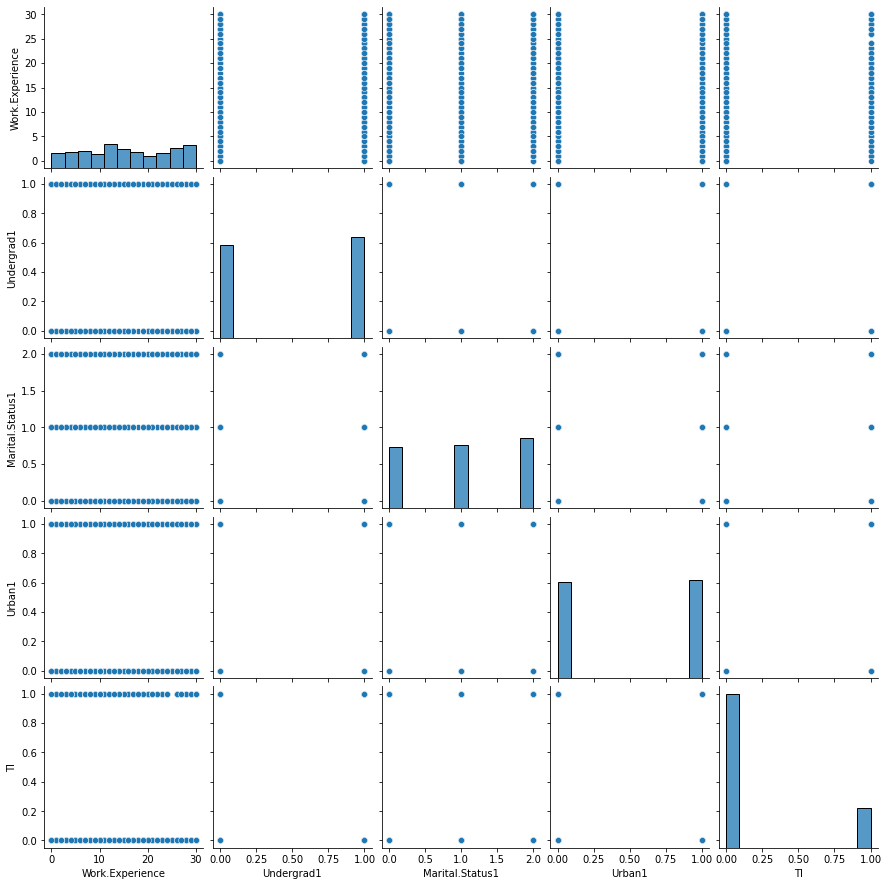

In [ ]:
sns.pairplot(f_c)

In [ ]:
# Correlation matrix

In [ ]:
f_c.corr()

,Work.Experience,Undergrad1,Marital.Status1,Urban1,TI
Work.Experience,1.000000,-0.005362,-0.002213,-0.094559,-0.001972
Undergrad1,-0.005362,1.000000,0.042407,-0.000267,0.012523
Marital.Status1,-0.002213,0.042407,1.000000,0.064562,0.006081
Urban1,-0.094559,-0.000267,0.064562,1.000000,0.004830
TI,-0.001972,0.012523,0.006081,0.004830,1.000000


From the correlation matrix , we see that Work.Experience and Urban population has the highest correlation between themselves.

In [ ]:
# Seperating independent and dependent variable

#  x  - independent variable
#  y  - dependent variable

In [ ]:
x = f_c.iloc[:,[3,5,6,7]]
y = f_c.iloc[:,-1]

In [ ]:
# Splitting Data into training and Testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=40)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 4) (180, 4) (420,) (180,)


In [ ]:
# Building Decision Tree...

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)


In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
fn = f_c.iloc[:,[3,5,6,7]]
cn = f_c.iloc[:,-1]

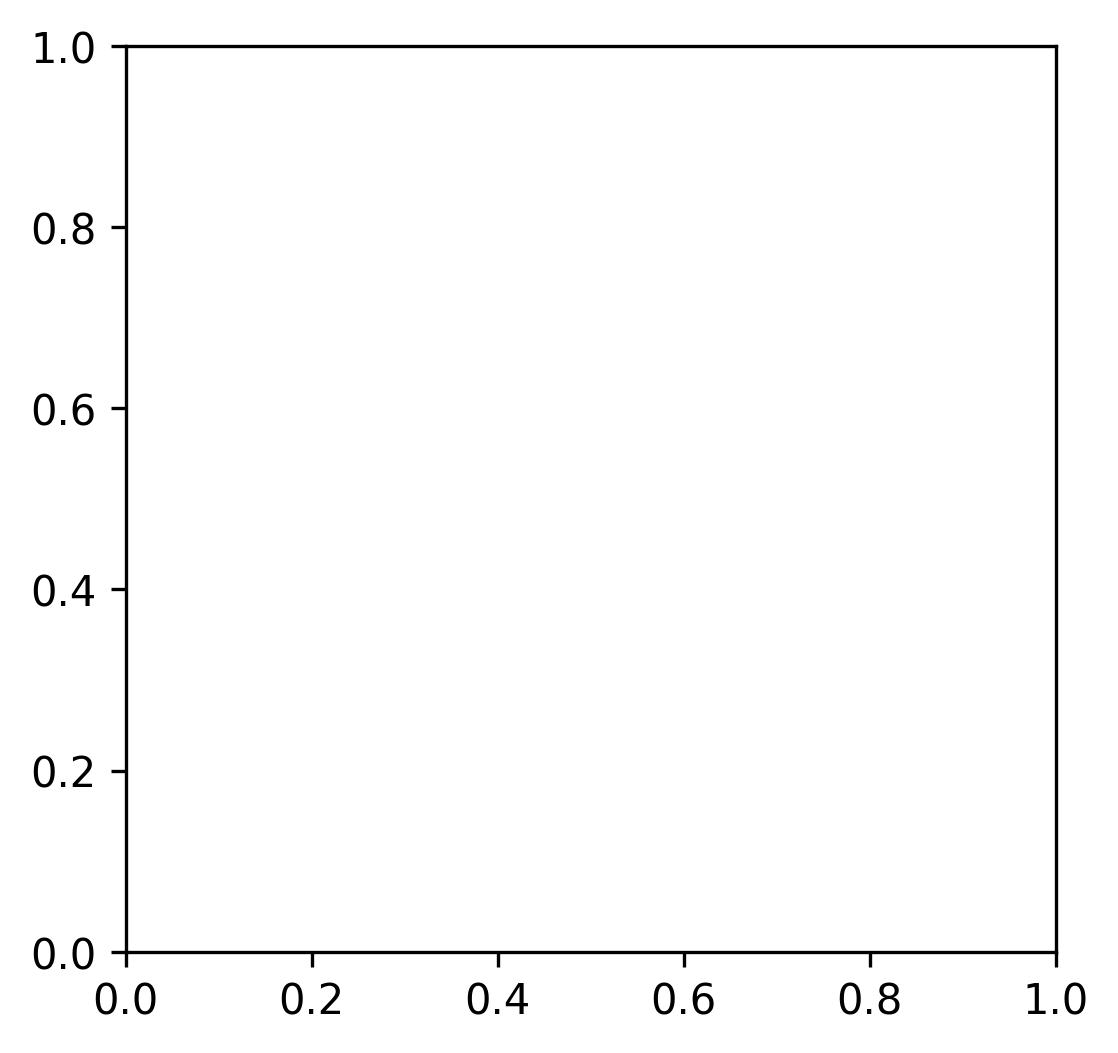

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)

[Text(0.5416666666666666, 0.875, 'X[1] <= 0.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 22.5\nentropy = 0.646\nsamples = 206\nvalue = [172, 34]'),
 Text(0.16666666666666666, 0.375, 'X[0] <= 12.5\nentropy = 0.694\nsamples = 150\nvalue = [122, 28]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.641\nsamples = 86\nvalue = [72, 14]'),
 Text(0.25, 0.125, 'entropy = 0.758\nsamples = 64\nvalue = [50, 14]'),
 Text(0.5, 0.375, 'X[2] <= 0.5\nentropy = 0.491\nsamples = 56\nvalue = [50, 6]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.61\nsamples = 40\nvalue = [34, 6]'),
 Text(0.75, 0.625, 'X[0] <= 0.5\nentropy = 0.784\nsamples = 214\nvalue = [164, 50]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 1.5\nentropy = 0.796\nsamples = 208\nvalue = [158, 50]'),
 Text(0.75, 0.125, 'entropy

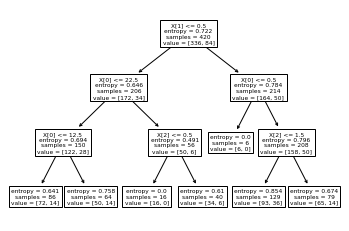

In [ ]:
tree.plot_tree(model)


In [ ]:
# Model Score

In [ ]:
model.score(x_test,y_test)

0.7777777777777778

In [ ]:
model.score(x_train,y_train)

0.8

Gini criterion

In [ ]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [ ]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
fn = f_c.iloc[:,[3,5,6,7]]
cn = f_c.iloc[:,-1]

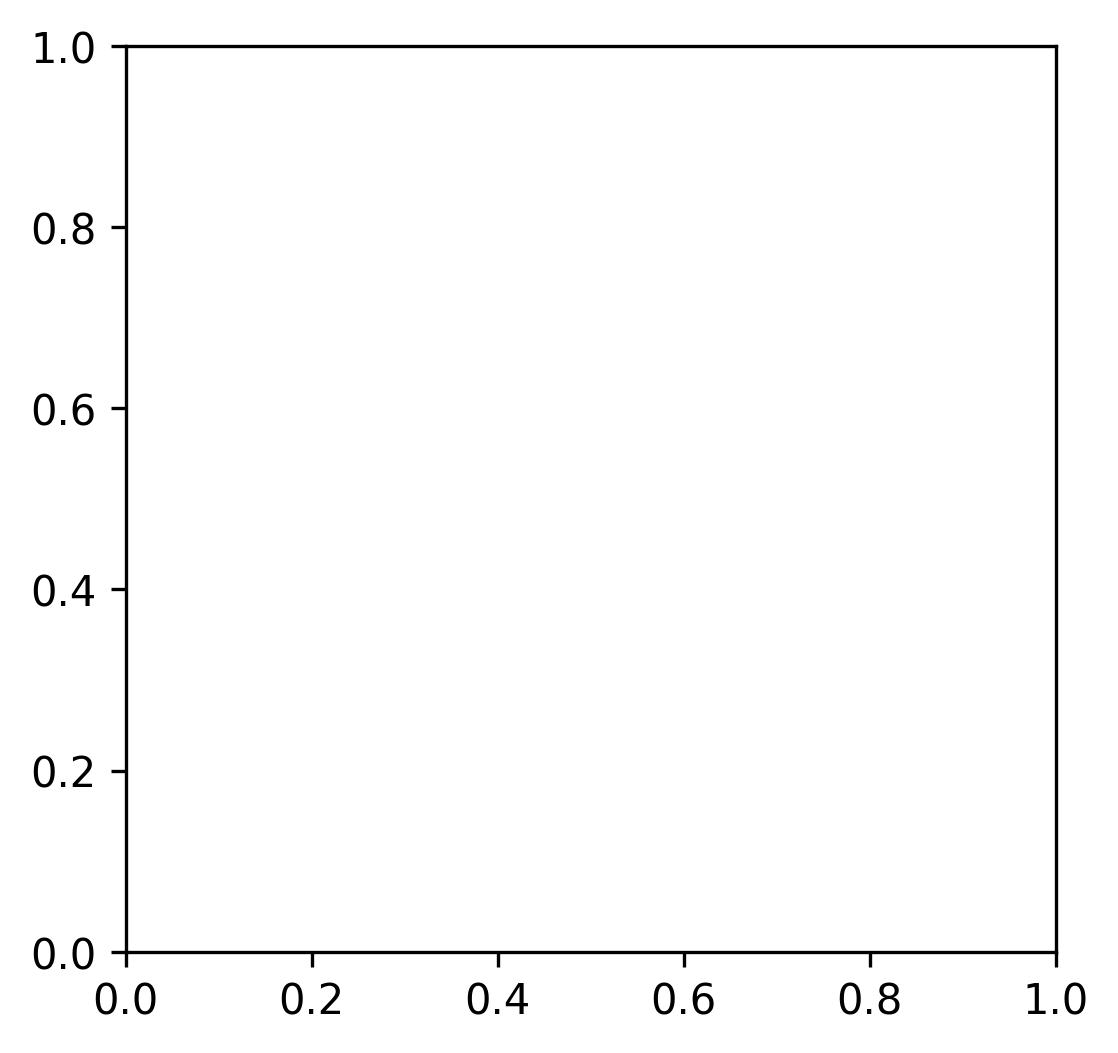

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)

[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.32\nsamples = 420\nvalue = [336, 84]'),
 Text(0.25, 0.625, 'X[0] <= 22.5\ngini = 0.276\nsamples = 206\nvalue = [172, 34]'),
 Text(0.125, 0.375, 'X[0] <= 12.5\ngini = 0.304\nsamples = 150\nvalue = [122, 28]'),
 Text(0.0625, 0.125, 'gini = 0.273\nsamples = 86\nvalue = [72, 14]'),
 Text(0.1875, 0.125, 'gini = 0.342\nsamples = 64\nvalue = [50, 14]'),
 Text(0.375, 0.375, 'X[2] <= 0.5\ngini = 0.191\nsamples = 56\nvalue = [50, 6]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.4375, 0.125, 'gini = 0.255\nsamples = 40\nvalue = [34, 6]'),
 Text(0.75, 0.625, 'X[2] <= 1.5\ngini = 0.358\nsamples = 214\nvalue = [164, 50]'),
 Text(0.625, 0.375, 'X[0] <= 0.5\ngini = 0.393\nsamples = 134\nvalue = [98, 36]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6875, 0.125, 'gini = 0.402\nsamples = 129\nvalue = [93, 36]'),
 Text(0.875, 0.375, 'X[0] <= 23.5\ngini = 0.289\nsamples = 80\nvalue = [66, 14]'),
 Text(0.

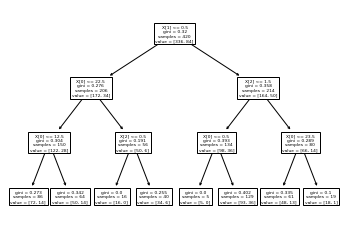

In [ ]:
tree.plot_tree(model1)

In [ ]:
model1.score(x_test,y_test)

0.7777777777777778

In [ ]:
model1.score(x_train,y_train)

0.8

In [ ]:
# Extracting the features which decide the factor

In [ ]:
model1.feature_importances_

array([0.48492875, 0.21369525, 0.301376  , 0.        ])

In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model1.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi

,feature,importance
0,Work.Experience,0.484929
2,Marital.Status1,0.301376
1,Undergrad1,0.213695
3,Urban1,0.000000


CONCLUSION:

From the above feature extraction column,we see that ** ''Work experience '' **  has the highest importance in making the decision of whether there occurs fraud in the 
city or not.